In [10]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
MINCOVERAGETHRESH = 1
df = pd.read_csv("/Users/ethanbaker/Grace2/enhancerSeq/analysis/H1WG.SCP1.H1.R1_5kbWindowsVsControl_Calculations.txt", sep='\t')
print(len(df.index))
df.drop("log(enhancerSeq/control)", axis=1, inplace=True)
df.sort_values(['mean_coverage','control_mean_coverage'],inplace=True)
df.drop(df[df.mean_coverage < MINCOVERAGETHRESH].index,inplace=True)
df.drop(df[df.control_mean_coverage < MINCOVERAGETHRESH].index, inplace = True)
df.head()

619146


,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage
334637,chr8,125095000,125100000,5005,1.0010,1.5212
312525,chr8,14535000,14540000,5006,1.0012,1.0356
332673,chr8,115275000,115280000,5006,1.0012,1.1320
202035,chr5,128540000,128545000,5006,1.0012,1.1590
415283,chr11,105210000,105215000,5009,1.0018,1.3004


In [7]:
len(df.index)

544383

In [9]:
df['FoldEnrichment'] = df["mean_coverage"]/df["control_mean_coverage"]
df.sort_values("FoldEnrichment", inplace=True)
df.head()

,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage,FoldEnrichment
421262,chr12,95000,100000,6188,1.2376,6.9086,0.179139
176329,chr5,10000,15000,54404,10.8808,52.6192,0.206784
106485,chr3,39970000,39975000,5347,1.0694,2.4600,0.434715
448011,chr12,133840000,133845000,26493,5.2986,11.8296,0.447910
143965,chr4,29345000,29350000,8033,1.6066,3.5590,0.451419


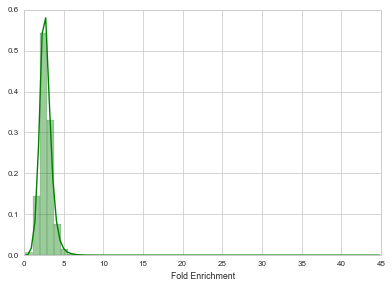

In [11]:
sns.set(style="whitegrid", context = "paper")
sns.distplot(df["FoldEnrichment"],color='g')
plt.xlabel("Fold Enrichment")
plt.show()

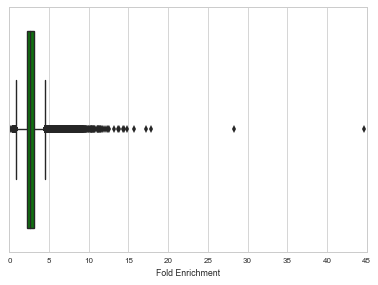

In [13]:
plt.clf()
sns.set(style="whitegrid", context = "paper")
sns.boxplot(df["FoldEnrichment"], color='g')
plt.xlabel("Fold Enrichment")
plt.show()

In [14]:
df["logFoldEnrichment"] = np.log(df["FoldEnrichment"])
df.head()

,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage,FoldEnrichment,logFoldEnrichment
421262,chr12,95000,100000,6188,1.2376,6.9086,0.179139,-1.719593
176329,chr5,10000,15000,54404,10.8808,52.6192,0.206784,-1.576081
106485,chr3,39970000,39975000,5347,1.0694,2.4600,0.434715,-0.833064
448011,chr12,133840000,133845000,26493,5.2986,11.8296,0.447910,-0.803162
143965,chr4,29345000,29350000,8033,1.6066,3.5590,0.451419,-0.795359


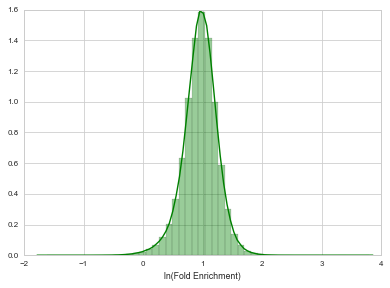

In [15]:
plt.clf()
sns.set(style="whitegrid", context = "paper")
sns.distplot(df["logFoldEnrichment"],color='g')
plt.xlabel("ln(Fold Enrichment)")
plt.show()

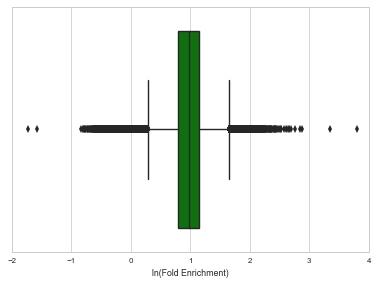

In [16]:
plt.clf()
sns.set(style="whitegrid", context = "paper")
sns.boxplot(df["logFoldEnrichment"],color='g')
plt.xlabel("ln(Fold Enrichment)")
plt.show()